In [487]:
# 安装环境
using Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `d:\ucas\论文\DHP`


In [488]:
using CSV
using DataFrames
using Plots
using LaTeXStrings
# using Plotly
# using ProgressMeter
using MLJ

In [489]:
data_forget = CSV.read("D:/SSP-MMC/data/opensource_dataset_forgetting_curve.tsv", delim='\t',DataFrame);
coerce!(data_forget, Count => Continuous)
schema(data_forget)

┌───────────┬────────────┬─────────┐
│ names     │ scitypes   │ types   │
├───────────┼────────────┼─────────┤
│ d         │ Continuous │ Float64 │
│ i         │ Continuous │ Float64 │
│ t_history │ Textual    │ String  │
│ r_history │ Textual    │ String  │
│ delta_t   │ Continuous │ Float64 │
│ p_recall  │ Continuous │ Float64 │
│ total_cnt │ Continuous │ Float64 │
└───────────┴────────────┴─────────┘


In [490]:
function fitted_linear_func(mach)
    p = fitted_params(mach)
    a = p.intercept
    b = p.coefs[1][2]
    # f(x)=θ̂₀+θ̂₁*ℯ^x
    # f(x)=x
    f(x)=exp(a+b*x)
end

fitted_linear_func (generic function with 1 method)

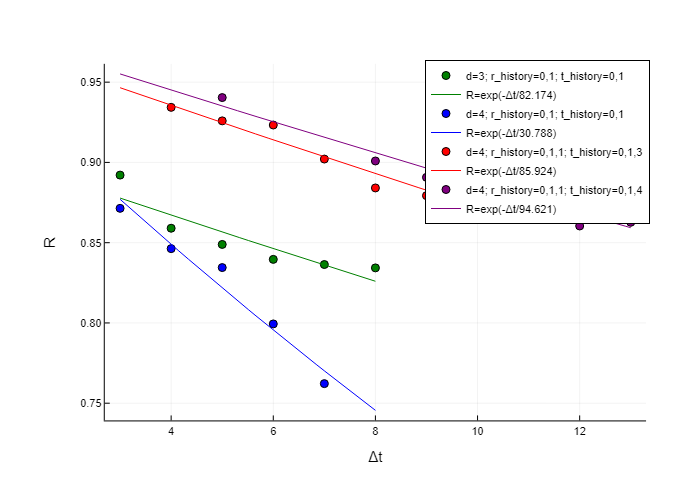

In [502]:
plotly()

p = plot(xlabel="Δt", ylabel="R")

function plot_data(d::Int, r_history::String, t_history::String, color::String)
    data_g = subset(data_forget, :d => x -> x .== d, :r_history => x -> x .== r_history, :t_history => x -> x .== t_history)
    plot!(data_g[!, :delta_t], data_g[!, :p_recall], seriestype=:scatter, color=color, label="d=$d; r_history=$r_history; t_history=$t_history")
    X, y = select(data_g, :delta_t), data_g[!, :p_recall]
    LinearRegressor = @load LinearRegressor pkg = MLJLinearModels verbosity = 0
    lr = LinearRegressor()
    machine_lr = machine(lr, X, log.(y))
    fit!(machine_lr, verbosity=0)
    S = -1 / fitted_params(machine_lr).coefs[1][2]

    S_3 = round(S; digits=3)

    plot!(fitted_linear_func(machine_lr), color=color, label="R=exp(-Δt/$S_3)")
end

plot_data(3, "0,1", "0,1", "green")
plot_data(4, "0,1", "0,1", "blue")
plot_data(4, "0,1,1", "0,1,3", "red")
plot_data(4, "0,1,1", "0,1,4", "purple")



savefig(p, "回归.svg")

p
    

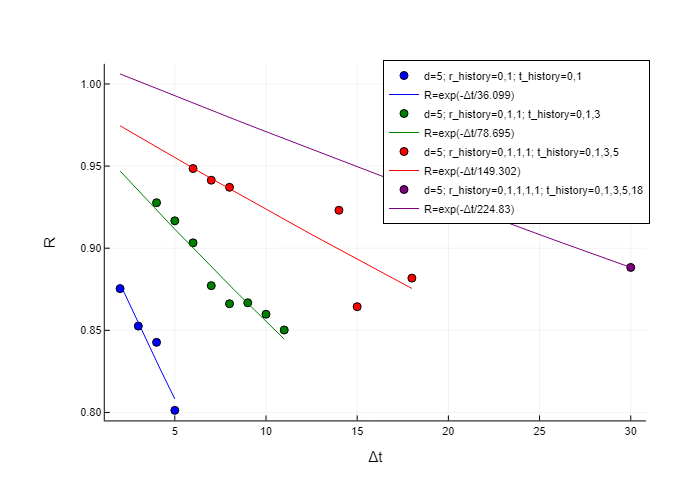

In [560]:
p1 = plot(xlabel="Δt", ylabel="R")

plot_data(5, "0,1", "0,1", "blue")
plot_data(5, "0,1,1", "0,1,3", "green")
plot_data(5, "0,1,1,1", "0,1,3,5", "red")
plot_data(5, "0,1,1,1,1", "0,1,3,5,18", "purple")

savefig(p1, "间隔.svg")

p1

# plot_data(5, "0,1,1,1", "0,1,5,9", "blue")
# plot_data(4, "0,1,1", "0,1,3", "red")
# plot_data(4, "0,1,1,1", "0,1,7,15", "purple")